In [234]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [238]:
df1 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/IDMT_features.csv", usecols=['class'], index_col=None)
df2 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/IDMT_librosa_features.csv", usecols=['frequency_coefficients', 'average_zero_cross_rate'], index_col=None)
df3 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/IDMT_statistical_features.csv", usecols=['mode_var', 's', 'g', 'variance', 'gstd_var', 'ent'], index_col=None)

df1_numpy = df1.to_numpy()
df2_numpy = df2.to_numpy()
df3_numpy = df3.to_numpy()

IDMT_C_data = list()
IDMT_M_data = list()
IDMT_T_data = list()
IDMT_Other_data = list()

In [239]:
for i in range(df3_numpy.shape[0]):
    if df1_numpy[i][0] == "C":
        IDMT_C_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [0])
    elif df1_numpy[i][0] == "M":
        IDMT_M_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [1])
    elif df1_numpy[i][0] == "T":
        IDMT_T_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [2])
    else:
        IDMT_Other_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [3])
IDMT_C_data = np.array(IDMT_C_data)
IDMT_M_data = np.array(IDMT_M_data)
IDMT_T_data = np.array(IDMT_T_data)
IDMT_Other_data = np.array(IDMT_Other_data)
print(np.array(IDMT_C_data).shape)
print(np.array(IDMT_M_data).shape)
print(np.array(IDMT_T_data).shape)
print(np.array(IDMT_Other_data).shape)

(3902, 9)
(251, 9)
(511, 9)
(53, 9)


In [240]:
# 归一化处理
IDMT_C_data_X = IDMT_C_data[:,:8]
IDMT_M_data_X = IDMT_M_data[:,:8]
IDMT_T_data_X = IDMT_T_data[:,:8]
IDMT_Other_data_X = IDMT_Other_data[:,:8]
IDMT_C_data_Y = IDMT_C_data[:,8:9]
IDMT_M_data_Y = IDMT_M_data[:,8:9]
IDMT_T_data_Y = IDMT_T_data[:,8:9]
IDMT_Other_data_Y = IDMT_Other_data[:,8:9]

# 对X数据的每一列进行归一化，归一化之后就变成了 0 到 1 之间
IDMT_C_data_X = IDMT_C_data_X / IDMT_C_data_X.max(axis=0)
IDMT_M_data_X = IDMT_M_data_X / IDMT_M_data_X.max(axis=0)
IDMT_T_data_X = IDMT_T_data_X / IDMT_T_data_X.max(axis=0)
IDMT_Other_data_X = IDMT_Other_data_X / IDMT_Other_data_X.max(axis=0)

In [241]:
df1 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/MVD_features.csv", usecols=['class'], index_col=None)
df2 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/MVD_librosa_features.csv", usecols=['frequency_coefficients', 'average_zero_cross_rate'], index_col=None)
df3 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/MVD_statistical_features.csv", usecols=['mode_var', 's', 'g', 'variance', 'gstd_var', 'ent'], index_col=None)

df1_numpy = df1.to_numpy()
df2_numpy = df2.to_numpy()
df3_numpy = df3.to_numpy()

MVD_C_data = list()
MVD_M_data = list()
MVD_T_data = list()
MVD_Other_data = list()

In [242]:
for i in range(df3_numpy.shape[0]):
    if df1_numpy[i][0] == "C":
        MVD_C_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [0])
    elif df1_numpy[i][0] == "M":
        MVD_M_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [1])
    elif df1_numpy[i][0] == "T":
        MVD_T_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [2])
    else:
        MVD_Other_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [3])

MVD_C_data = np.array(MVD_C_data)
MVD_M_data = np.array(MVD_M_data)
MVD_T_data = np.array(MVD_T_data)
MVD_Other_data = np.array(MVD_Other_data)
print(np.array(MVD_C_data).shape)
print(np.array(MVD_M_data).shape)
print(np.array(MVD_T_data).shape)
print(np.array(MVD_Other_data).shape)

(1005, 9)
(1122, 9)
(1077, 9)
(1025, 9)


In [243]:
# 归一化处理
MVD_C_data_X = MVD_C_data[:,:8]
MVD_M_data_X = MVD_M_data[:,:8]
MVD_T_data_X = MVD_T_data[:,:8]
MVD_Other_data_X = MVD_Other_data[:,:8]
MVD_C_data_Y = MVD_C_data[:,8:9]
MVD_M_data_Y = MVD_M_data[:,8:9]
MVD_T_data_Y = MVD_T_data[:,8:9]
MVD_Other_data_Y = MVD_Other_data[:,8:9]

# 对X数据的每一列进行归一化，归一化之后就变成了 0 到 1 之间
MVD_C_data_X = MVD_C_data_X / MVD_C_data_X.max(axis=0)
MVD_M_data_X = MVD_M_data_X / MVD_M_data_X.max(axis=0)
MVD_T_data_X = MVD_T_data_X / MVD_T_data_X.max(axis=0)
MVD_Other_data_X = MVD_Other_data_X / MVD_Other_data_X.max(axis=0)

In [244]:
IDMT_C_indexs = np.random.choice(IDMT_C_data_X.shape[0], size=100, replace=False)
MVD_C_indexs = np.random.choice(MVD_C_data_X.shape[0], size=100, replace=False)
C_data = np.concatenate((np.concatenate((IDMT_C_data_X[IDMT_C_indexs], IDMT_C_data_Y[IDMT_C_indexs]), axis=1), np.concatenate((MVD_C_data_X[MVD_C_indexs], MVD_C_data_Y[MVD_C_indexs]), axis=1)), axis=0)
IDMT_M_indexs = np.random.choice(IDMT_M_data_X.shape[0], size=100, replace=False)
MVD_M_indexs = np.random.choice(MVD_M_data_X.shape[0], size=100, replace=False)
M_data = np.concatenate((np.concatenate((IDMT_M_data_X[IDMT_M_indexs], IDMT_M_data_Y[IDMT_M_indexs]), axis=1), np.concatenate((MVD_M_data_X[MVD_M_indexs], MVD_M_data_Y[MVD_M_indexs]), axis=1)), axis=0)
IDMT_T_indexs = np.random.choice(IDMT_T_data_X.shape[0], size=100, replace=False)
MVD_T_indexs = np.random.choice(MVD_T_data_X.shape[0], size=100, replace=False)
T_data = np.concatenate((np.concatenate((IDMT_T_data_X[IDMT_T_indexs], IDMT_T_data_Y[IDMT_T_indexs]), axis=1), np.concatenate((MVD_T_data_X[MVD_T_indexs], MVD_T_data_Y[MVD_T_indexs]), axis=1)), axis=0)
MVD_Other_indexs = np.random.choice(MVD_Other_data_X.shape[0], size=147, replace=False)
Other_data = np.concatenate((np.concatenate((IDMT_Other_data_X, IDMT_Other_data_Y), axis=1), np.concatenate((MVD_Other_data_X[MVD_Other_indexs], MVD_Other_data_Y[MVD_Other_indexs]), axis=1)), axis=0)

C_data_X = np.concatenate((np.concatenate((IDMT_C_data_X, IDMT_C_data_Y), axis=1), np.concatenate((MVD_C_data_X, MVD_C_data_Y), axis=1)), axis=0)
C_data = np.random.choice(C_data_X.shape[0], size=500, replace=False)
C_data = C_data_X[C_data]

M_data_X = np.concatenate((np.concatenate((IDMT_M_data_X, IDMT_M_data_Y), axis=1), np.concatenate((MVD_M_data_X, MVD_M_data_Y), axis=1)), axis=0)
M_data = np.random.choice(M_data_X.shape[0], size=500, replace=False)
M_data = M_data_X[M_data]

T_data_X = np.concatenate((np.concatenate((IDMT_T_data_X, IDMT_T_data_Y), axis=1), np.concatenate((MVD_T_data_X, MVD_T_data_Y), axis=1)), axis=0)
T_data = np.random.choice(T_data_X.shape[0], size=500, replace=False)
T_data = T_data_X[T_data]

Other_data_X = np.concatenate((np.concatenate((IDMT_Other_data_X, IDMT_Other_data_Y), axis=1), np.concatenate((MVD_Other_data_X, MVD_Other_data_Y), axis=1)), axis=0)
Other_data = np.random.choice(Other_data_X.shape[0], size=500, replace=False)
Other_data = Other_data_X[Other_data]

print(C_data_X.shape)
print(M_data_X.shape)
print(T_data_X.shape)
print(Other_data_X.shape)

print(C_data.shape)
print(M_data.shape)
print(T_data.shape)
print(Other_data.shape)

(4907, 9)
(1373, 9)
(1588, 9)
(1078, 9)
(500, 9)
(500, 9)
(500, 9)
(500, 9)


In [245]:
all_data = np.concatenate((C_data, M_data, T_data, Other_data), axis=0)
all_data_X = all_data[:,:8]
all_data_Y = all_data[:,8:9]
# 划分数据集，测试集占总数据的25%，随机状态设置为42以确保结果可复现
X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=13, random_state=43)

# 训练模型
rf.fit(X_train, y_train)

# 预测训练集
y_pred = rf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.2f}")

Train accuracy: 1.00


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [246]:
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_train, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# 预测测试集
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[396   0   0   0]
 [  0 404   0   1]
 [  0   0 412   0]
 [  0   0   0 387]]
[[1.         0.         0.         0.        ]
 [0.         0.99753086 0.         0.00246914]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]
Test accuracy: 0.89
[[ 92   6   6   0]
 [  1  87   5   2]
 [  4   9  75   0]
 [  2   9   1 101]]
[[0.88461538 0.05769231 0.05769231 0.        ]
 [0.01052632 0.91578947 0.05263158 0.02105263]
 [0.04545455 0.10227273 0.85227273 0.        ]
 [0.01769912 0.07964602 0.00884956 0.89380531]]


In [247]:
C_data_X.shape

(4907, 9)

In [248]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance')
svc = SVC(kernel='poly', C=100, degree=3, gamma='scale', probability=True)

In [251]:
knn.fit(X_train, y_train)

# 预测训练集
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_train, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# 预测测试集
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

Train accuracy: 1.00
[[396   0   0   0]
 [  0 405   0   0]
 [  0   0 412   0]
 [  0   0   0 387]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Test accuracy: 0.83
[[91  6  6  1]
 [ 3 77 14  1]
 [18  6 64  0]
 [ 2 10  2 99]]
[[0.875      0.05769231 0.05769231 0.00961538]
 [0.03157895 0.81052632 0.14736842 0.01052632]
 [0.20454545 0.06818182 0.72727273 0.        ]
 [0.01769912 0.08849558 0.01769912 0.87610619]]


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [252]:
svc.fit(X_train, y_train)

# 预测训练集
y_pred = svc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_train, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# 预测测试集
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

Train accuracy: 0.35
[[186   0   0 210]
 [ 42   0   0 363]
 [ 80   0   0 332]
 [ 15   0   0 372]]
[[0.46969697 0.         0.         0.53030303]
 [0.1037037  0.         0.         0.8962963 ]
 [0.19417476 0.         0.         0.80582524]
 [0.03875969 0.         0.         0.96124031]]
Test accuracy: 0.41
[[ 53   0   0  51]
 [ 12   0   0  83]
 [ 23   0   0  65]
 [  4   0   0 109]]
[[0.50961538 0.         0.         0.49038462]
 [0.12631579 0.         0.         0.87368421]
 [0.26136364 0.         0.         0.73863636]
 [0.03539823 0.         0.         0.96460177]]


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [253]:
df1 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/IDMT_features.csv", usecols=['class'], index_col=None)
df2 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/IDMT_librosa_features.csv", usecols=['frequency_coefficients', 'short_time_energy', 'average_zero_cross_rate'], index_col=None)
df3 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/IDMT_statistical_features.csv", usecols=["mode_var","k","s","mean","i","g","h","dev","var","variance","std","gstd_var","ent"], index_col=None)

df1_numpy = df1.to_numpy()
df2_numpy = df2.to_numpy()
df3_numpy = df3.to_numpy()

IDMT_C_data = list()
IDMT_M_data = list()
IDMT_T_data = list()
IDMT_Other_data = list()

In [254]:
for i in range(df3_numpy.shape[0]):
    if df1_numpy[i][0] == "C":
        IDMT_C_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [0])
    elif df1_numpy[i][0] == "M":
        IDMT_M_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [1])
    elif df1_numpy[i][0] == "T":
        IDMT_T_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [2])
    else:
        IDMT_Other_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [3])
IDMT_C_data = np.array(IDMT_C_data)
IDMT_M_data = np.array(IDMT_M_data)
IDMT_T_data = np.array(IDMT_T_data)
IDMT_Other_data = np.array(IDMT_Other_data)
print(np.array(IDMT_C_data).shape)
print(np.array(IDMT_M_data).shape)
print(np.array(IDMT_T_data).shape)
print(np.array(IDMT_Other_data).shape)

(3902, 17)
(251, 17)
(511, 17)
(53, 17)


In [255]:
df1 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/MVD_features.csv", usecols=['class'], index_col=None)
df2 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/MVD_librosa_features.csv", usecols=['frequency_coefficients', 'short_time_energy', 'average_zero_cross_rate'], index_col=None)
df3 = pd.read_csv("/Users/apple/Acoustic-Classification/Random_forest/MVD_statistical_features.csv", usecols=["mode_var","k","s","mean","i","g","h","dev","var","variance","std","gstd_var","ent"], index_col=None)

df1_numpy = df1.to_numpy()
df2_numpy = df2.to_numpy()
df3_numpy = df3.to_numpy()

MVD_C_data = list()
MVD_M_data = list()
MVD_T_data = list()
MVD_Other_data = list()

In [256]:
for i in range(df3_numpy.shape[0]):
    if df1_numpy[i][0] == "C":
        MVD_C_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [0])
    elif df1_numpy[i][0] == "M":
        MVD_M_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [1])
    elif df1_numpy[i][0] == "T":
        MVD_T_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [2])
    else:
        MVD_Other_data.append(df2_numpy[i].tolist() + df3_numpy[i].tolist() + [3])

MVD_C_data = np.array(MVD_C_data)
MVD_M_data = np.array(MVD_M_data)
MVD_T_data = np.array(MVD_T_data)
MVD_Other_data = np.array(MVD_Other_data)
print(np.array(MVD_C_data).shape)
print(np.array(MVD_M_data).shape)
print(np.array(MVD_T_data).shape)
print(np.array(MVD_Other_data).shape)

(1005, 17)
(1122, 17)
(1077, 17)
(1025, 17)


In [257]:
C_data_X = np.concatenate((IDMT_C_data, MVD_C_data), axis=0)
C_data = np.random.choice(C_data_X.shape[0], size=500, replace=False)
C_data = C_data_X[C_data]

M_data_X = np.concatenate((IDMT_M_data, MVD_M_data), axis=0)
M_data = np.random.choice(M_data_X.shape[0], size=500, replace=False)
M_data = M_data_X[M_data]

T_data_X = np.concatenate((IDMT_T_data, MVD_T_data), axis=0)
T_data = np.random.choice(T_data_X.shape[0], size=500, replace=False)
T_data = T_data_X[T_data]

Other_data_X = np.concatenate((IDMT_Other_data, MVD_Other_data), axis=0)
Other_data = np.random.choice(Other_data_X.shape[0], size=500, replace=False)
Other_data = Other_data_X[Other_data]

print(C_data_X.shape)
print(M_data_X.shape)
print(T_data_X.shape)
print(Other_data_X.shape)

print(C_data.shape)
print(M_data.shape)
print(T_data.shape)
print(Other_data.shape)

(4907, 17)
(1373, 17)
(1588, 17)
(1078, 17)
(500, 17)
(500, 17)
(500, 17)
(500, 17)


In [258]:
all_data = np.concatenate((C_data, M_data, T_data, Other_data), axis=0)

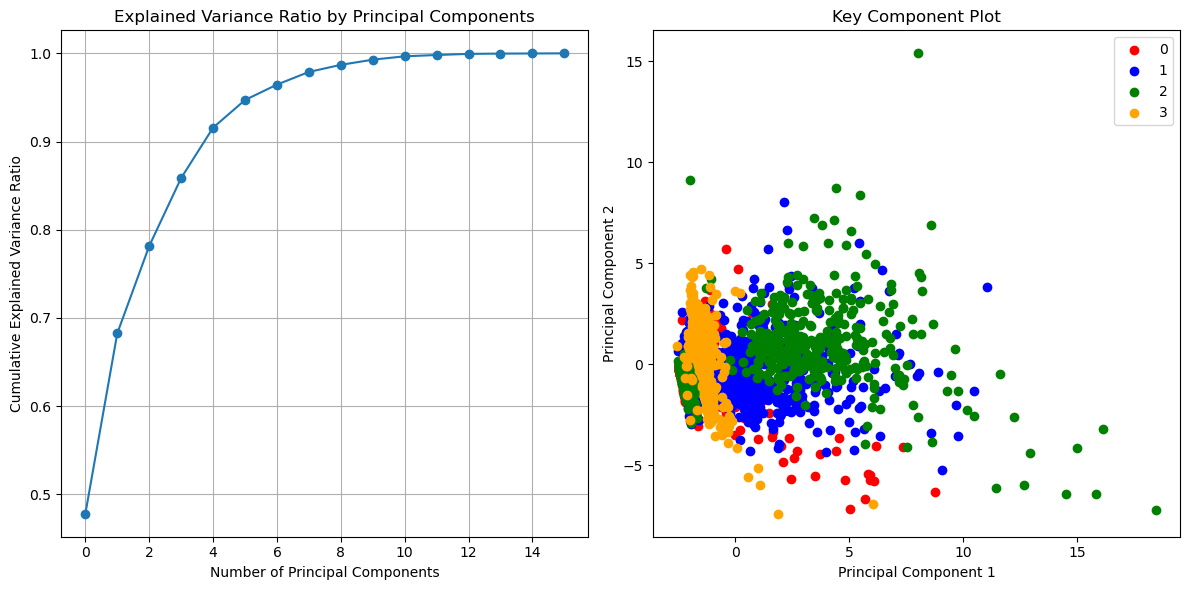

<Figure size 640x480 with 0 Axes>

                              PC1       PC2       PC3       PC4
frequency_coefficients  -0.165371 -0.070667 -0.090748  0.267754
short_time_energy        0.330443  0.154856 -0.167083  0.072921
average_zero_cross_rate  0.109053 -0.408729  0.175968  0.199682
mode_var                 0.259390 -0.158770  0.155203 -0.282474
k                        0.096779  0.297073  0.516433  0.372331
s                        0.121670  0.344941  0.499293  0.242485
mean                     0.351414  0.031978 -0.148636  0.025198
i                        0.345356 -0.027950 -0.106621  0.087162
g                        0.340397 -0.115984  0.030285 -0.116442
h                        0.289198 -0.171189  0.132694 -0.257295
dev                      0.342388 -0.045850 -0.085318  0.087730
var                     -0.048158  0.495490  0.072574 -0.267249
variance                 0.288653  0.201459 -0.181647  0.094122
std                      0.326255  0.172804 -0.155826  0.076094
gstd_var                -0.071474  0.138

In [259]:
numerical_df = pd.DataFrame(all_data, columns=['frequency_coefficients', 'short_time_energy', 'average_zero_cross_rate', "mode_var","k","s","mean","i","g","h","dev","var","variance","std","gstd_var","ent", 'class'])
numerical_no_class = numerical_df.drop(columns="class")
# Standardize the numerical data
standardized_data = (numerical_no_class - numerical_no_class.mean()) / numerical_no_class.std()
#standardized_data = (numerical_df - numerical_df.mean()) / numerical_df.std()
    
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)
    
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
    
# Plot explained variance ratio
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
    
# Plot key component plot

class_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  # Add more if needed
#class_colors = {'B': 'red', 'C': 'blue', 'T': 'green', 'M': 'orange'}  # Add more if needed

    
# Create a custom colormap using ListedColormap
plt.subplot(1, 2, 2)
for category, color in class_colors.items():
    plt.scatter(principal_components[numerical_df["class"] == category, 0], 
                principal_components[numerical_df["class"] == category, 1], 
                color=color, 
                label=category)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Key Component Plot')
plt.legend()
    
plt.tight_layout()
plt.show()
    
plt.tight_layout()
plt.show()
    
# Return the PCA results
result_dict =  {
    'principal_components': principal_components,
    'explained_variance_ratio': explained_variance_ratio,
    'pca': pca
}

loadings = pca.components_[:4]
loading_matrix = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=numerical_no_class.columns)
print(loading_matrix)

In [278]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(standardized_data)

# 将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, numerical_df["class"], test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=10, random_state=43)

# 训练模型
rf.fit(X_train, y_train)

# 预测训练集
y_pred = rf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.2f}")

Train accuracy: 0.94


In [279]:
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_train, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# 预测测试集
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[390   4   0   2]
 [  0 402   3   0]
 [ 73   4 335   0]
 [  1   1   0 385]]
[[0.98484848 0.01010101 0.         0.00505051]
 [0.         0.99259259 0.00740741 0.        ]
 [0.17718447 0.00970874 0.8131068  0.        ]
 [0.00258398 0.00258398 0.         0.99483204]]
Test accuracy: 0.82
[[ 87  11   2   4]
 [  6  76  12   1]
 [ 21   8  58   1]
 [  6   1   0 106]]
[[0.83653846 0.10576923 0.01923077 0.03846154]
 [0.06315789 0.8        0.12631579 0.01052632]
 [0.23863636 0.09090909 0.65909091 0.01136364]
 [0.05309735 0.00884956 0.         0.9380531 ]]


In [280]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance')
svc = SVC(kernel='poly', C=100, degree=3, gamma='scale', probability=True)

In [281]:
knn.fit(X_train, y_train)

# 预测训练集
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_train, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# 预测测试集
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

Train accuracy: 1.00
[[396   0   0   0]
 [  0 405   0   0]
 [  0   0 412   0]
 [  0   0   0 387]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Test accuracy: 0.80
[[ 77  13  12   2]
 [  5  77  11   2]
 [ 20   8  60   0]
 [  6   2   0 105]]
[[0.74038462 0.125      0.11538462 0.01923077]
 [0.05263158 0.81052632 0.11578947 0.02105263]
 [0.22727273 0.09090909 0.68181818 0.        ]
 [0.05309735 0.01769912 0.         0.92920354]]


In [282]:
svc.fit(X_train, y_train)

# 预测训练集
y_pred = svc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_train, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

# 预测测试集
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
# 使用confusion_matrix函数生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 打印混淆矩阵
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

Train accuracy: 0.82
[[335  47   7   7]
 [ 17 360  26   2]
 [125  32 255   0]
 [ 17   9   0 361]]
[[0.8459596  0.11868687 0.01767677 0.01767677]
 [0.04197531 0.88888889 0.06419753 0.00493827]
 [0.30339806 0.0776699  0.61893204 0.        ]
 [0.04392765 0.02325581 0.         0.93281654]]
Test accuracy: 0.80
[[ 88  12   1   3]
 [  8  74  13   0]
 [ 23  12  52   1]
 [  6   2   0 105]]
[[0.84615385 0.11538462 0.00961538 0.02884615]
 [0.08421053 0.77894737 0.13684211 0.        ]
 [0.26136364 0.13636364 0.59090909 0.01136364]
 [0.05309735 0.01769912 0.         0.92920354]]
